In [1543]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [1544]:
#imports

import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt



# Reading and Understanding the Data

In [1545]:
#Reading data from csv file

day = pd.read_csv("day.csv")

In [1546]:
# Check the head of the dataset
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the housing dataframe

In [1547]:
day.shape

(730, 16)

In [1548]:
day.info()

#All variables are non null.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1549]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data Preparation

In [1550]:
#Duplicate check and dropping the duplicate row if any

day_duplicate = day.copy()
day_duplicate.drop_duplicates(inplace=True)
day_duplicate.shape

(730, 16)

No duplicates present as the shape before and after dorpping duplicates is same.

In [1551]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [1552]:
day_new = day[['season', 'yr', 'mnth', 'holiday', 'weekday',
              'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

In [1553]:
day_new.shape

(730, 12)

In [1554]:
day_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Creating DUMMY variables

In [1555]:
day_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1556]:
#Here, season, mnth, weathersit, weekday are categorical varibales. We need to convert them inorder to create dummy variables

# Convert to category data type

day_new['season']=day_new['season'].astype('category')
day_new['weathersit']=day_new['weathersit'].astype('category')
day_new['mnth']=day_new['mnth'].astype('category')
day_new['weekday']=day_new['weekday'].astype('category')

In [1557]:
day_new = pd.get_dummies(day_new, drop_first=True)
day_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [1558]:
day_new.shape

(730, 30)

# Splitting the data into Train and Test

In [1559]:
#Shape before split
day_new.shape

(730, 30)

In [1560]:
#Info before split
day_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [1561]:
# Specifying 'random_state' so that the train and test data set always have the same rows, respectively.

np.random.seed(0)
df_train,df_test = train_test_split(day_new, train_size=0.70, random_state=100)

In [1562]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [1563]:
df_train.shape

(510, 30)

In [1564]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   atemp         220 non-null    float64
 5   hum           220 non-null    float64
 6   windspeed     220 non-null    float64
 7   cnt           220 non-null    int64  
 8   season_2      220 non-null    uint8  
 9   season_3      220 non-null    uint8  
 10  season_4      220 non-null    uint8  
 11  mnth_2        220 non-null    uint8  
 12  mnth_3        220 non-null    uint8  
 13  mnth_4        220 non-null    uint8  
 14  mnth_5        220 non-null    uint8  
 15  mnth_6        220 non-null    uint8  
 16  mnth_7        220 non-null    uint8  
 17  mnth_8        220 non-null    uint8  
 18  mnth_9        220 non-null  

In [1565]:
df_test.shape

(220, 30)

# Exploratory Data Analysis

#### Visualising Numerical Variables

In [1566]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [1567]:
day_numeric = df_train[['temp','atemp','hum','windspeed','cnt']]

<Figure size 1500x3000 with 0 Axes>

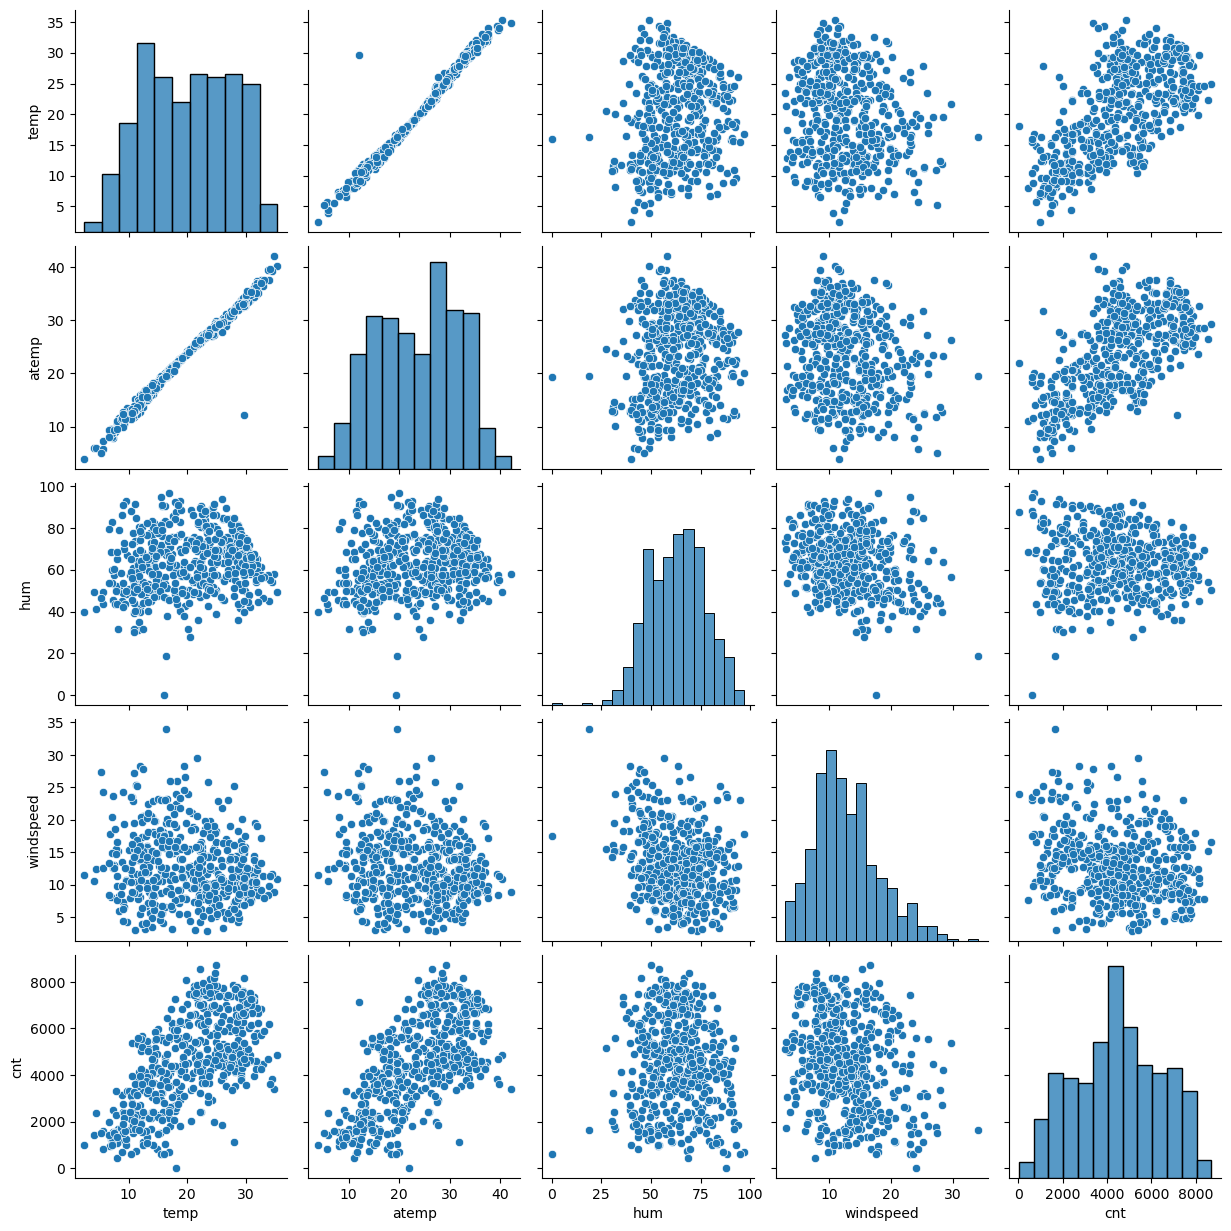

In [1568]:
plt.figure(figsize = (15,30))
sns.pairplot(day_numeric)
plt.show()

Findings

    temp and atemp clearly is showing correlation with each other
    Clearly, there is a linear relation between variables "temp", "atemp" and "cnt"

#### Visualising Categorical Variables

In [1569]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


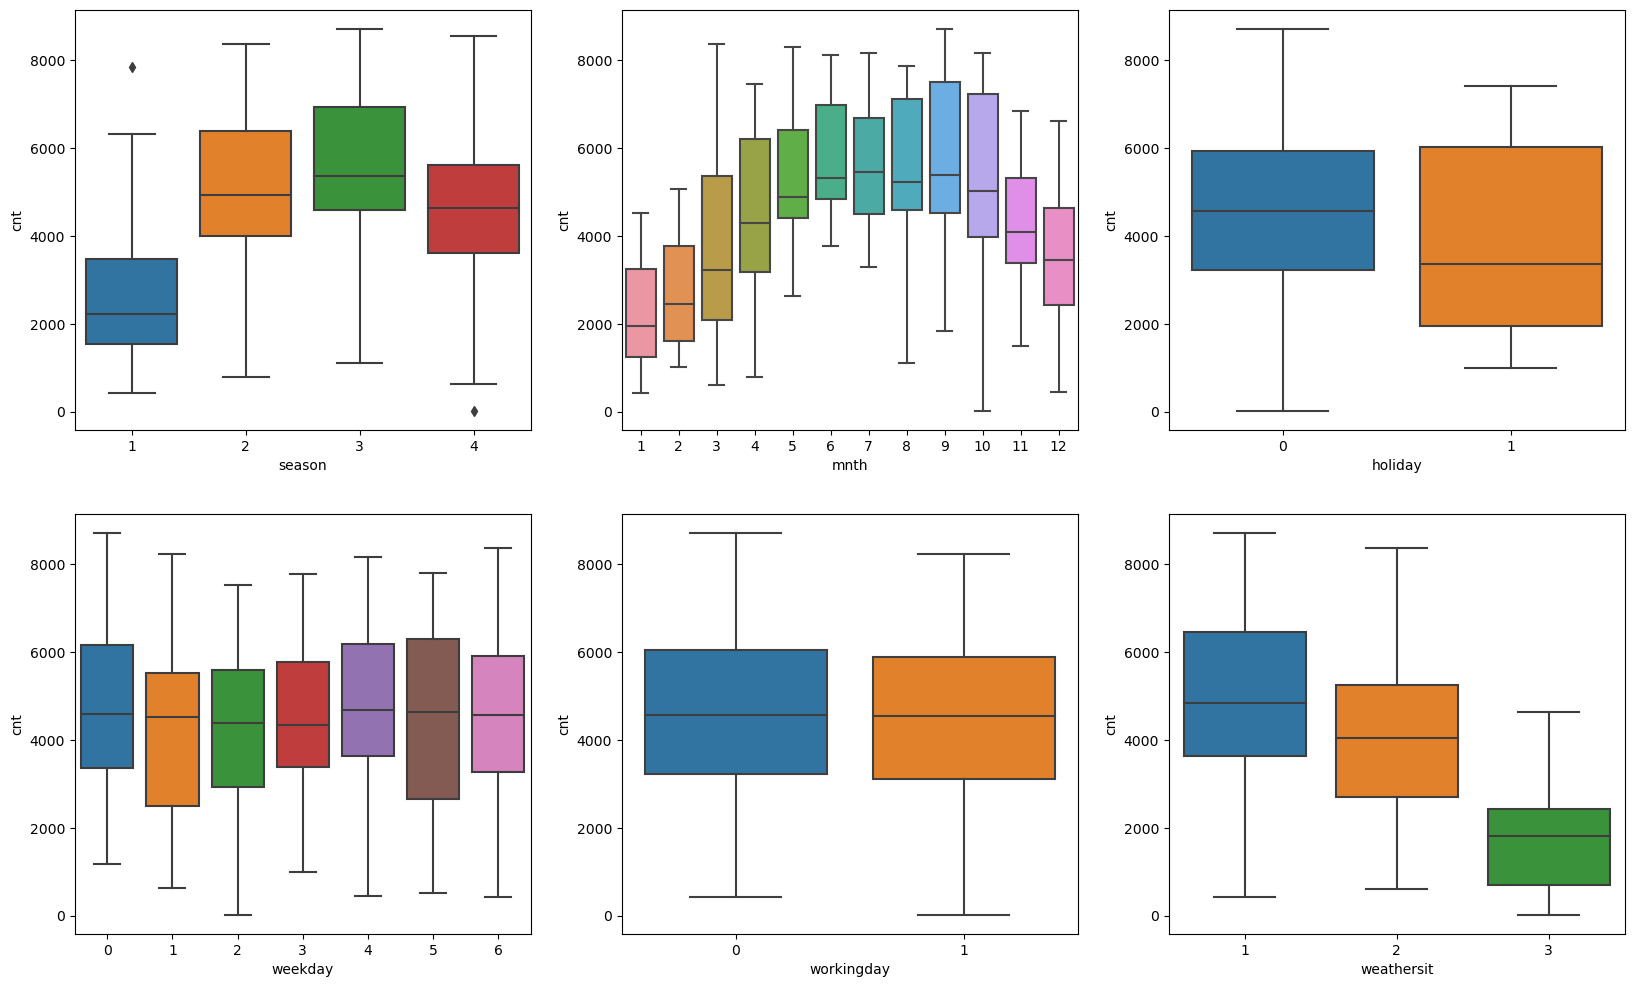

In [1570]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.show()

* season - Most of the bookings happened in season 3 and followed by season 2, season 4 and season 1. This is showing some trend and season can be a good predictor variable.

* mnth - High bookings were found in months 5,6,7,8,9 with median >4000 bookings per month. Month is also shpwing some trend when it comes to booking and month can be a good predictor variable

* weekday - Is having almost similar trend throughout. This may or maynot be a good predictor variable.

* weathersit - Most of the bookings happened in weathersit 1  followed by weathersit2 and weathersit3. This is showing atrend and can be a good predictor variable.

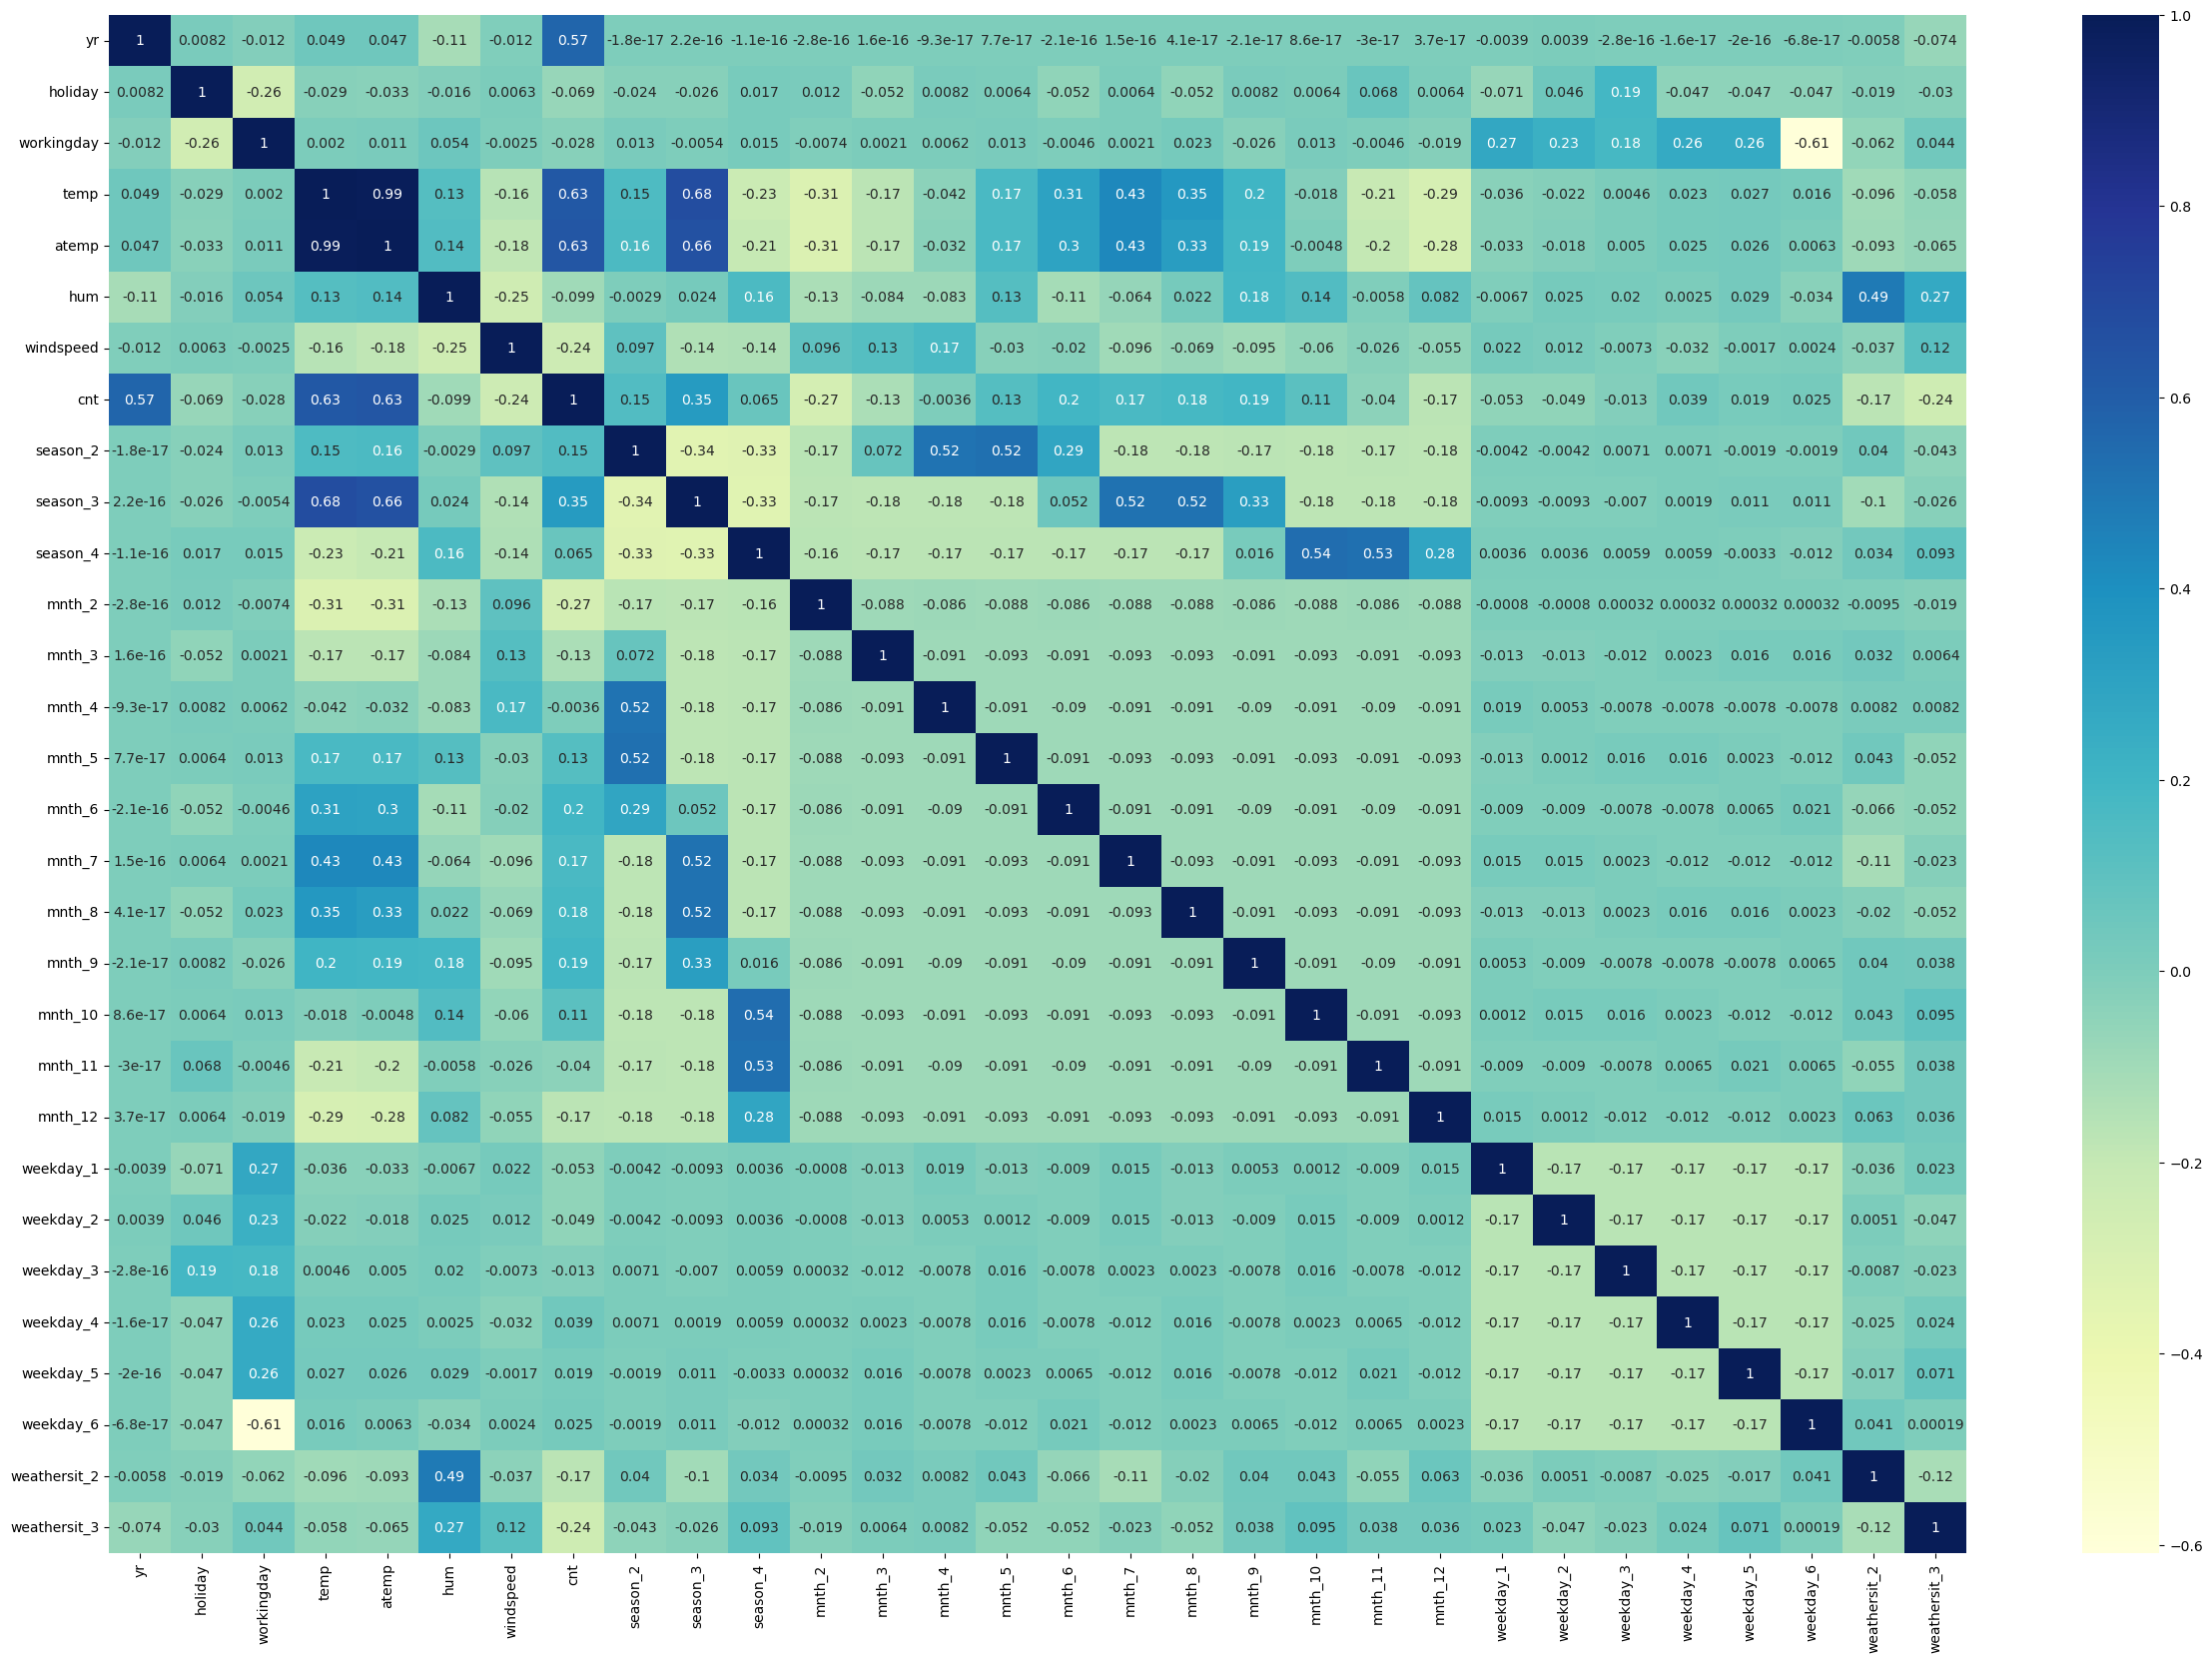

In [1571]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30,20))
sns.heatmap(day_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

Since, we are seeing many variables with high correlation, we can confirm that more than one variable have correlation with the target variable.

## RESCALING THE FEATURES

In [1572]:
#values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,1,0,...,0,0,0,0,0,0,0,0,1,0


In [1573]:
#We have imported MinMaxScaler from sklearn.processing (from sklearn.preprocessing import MinMaxScaler)
scaler = MinMaxScaler()

In [1574]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [1575]:
#values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,0,0,1,0


In [1576]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.345098,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Building a Linear Model

In [1577]:
### Dividing into X and Y sets for the model building

y_train = df_train.pop('cnt')
X_train = df_train

### RFE - Recuresive Feature Elimination

In [1578]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1579]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1580]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 2),
 ('season_4', True, 1),
 ('mnth_2', False, 2),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 2),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 2),
 ('mnth_12', False, 2),
 ('weekday_1', False, 2),
 ('weekday_2', False, 2),
 ('weekday_3', False, 2),
 ('weekday_4', False, 2),
 ('weekday_5', False, 2),
 ('weekday_6', False, 2),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

In [1581]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4',
       'mnth_3', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_3'],
      dtype='object')

In [1582]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'season_3', 'mnth_2', 'mnth_4', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2'],
      dtype='object')

In [1583]:

X_train_rfe = X_train[col]

## Building model using statsmodel, for the detailed statistics

### MODEL 1

In [1584]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,10.70
3,hum,10.64
4,windspeed,3.77
5,season_2,2.49
6,season_4,2.32
0,yr,2.03
8,mnth_5,1.88
10,mnth_8,1.76
9,mnth_6,1.63
12,mnth_10,1.60


In [1585]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_rfe)

In [1586]:
lm1 = sm.OLS(y_train,X_train_lm1).fit()   # Running the linear model

In [1587]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.0
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          7.78e-184
Time:                        21:15:27   Log-Likelihood:                 499.58
No. Observations:                 510   AIC:                            -969.2
Df Residuals:                     495   BIC:                            -905.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2807      0.027     10.503   

* Removing variable mnth_6 since it is having the highest pvalue > 0.05. 

### MODEL 2

In [1588]:
#Creating new model after dropping "mnth_6"
#X_train_new = X_train_lm1.drop(["mnth_6"], axis = 1)
X_train_new = X_train_rfe.drop(["mnth_6"], axis = 1)

In [1589]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4',
       'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10', 'weathersit_3'],
      dtype='object')

In [1590]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.46
2,temp,8.80
4,windspeed,3.74
6,season_4,2.31
5,season_2,2.30
0,yr,2.03
8,mnth_5,1.62
9,mnth_8,1.60
11,mnth_10,1.59
10,mnth_9,1.34


In [1591]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4',
       'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10', 'weathersit_3'],
      dtype='object')

In [1592]:
# Adding a constant variable 

X_train_lm2 = sm.add_constant(X_train_new)

In [1593]:
lm2 = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model

In [1594]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     194.0
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          6.89e-185
Time:                        21:15:27   Log-Likelihood:                 499.34
No. Observations:                 510   AIC:                            -970.7
Df Residuals:                     496   BIC:                            -911.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2804      0.027     10.498   

* Removing variable "mnth_3" since it has highest Pvalue>0.05

### MODEL 3

In [1595]:
#Creating new model after dropping "mnth_3"
#X_train_new = X_train_lm2.drop(["mnth_5"], axis = 1)
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

In [1596]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.14
2,temp,8.71
4,windspeed,3.65
5,season_2,2.29
6,season_4,2.23
0,yr,2.02
8,mnth_8,1.59
10,mnth_10,1.59
7,mnth_5,1.58
9,mnth_9,1.33


In [1597]:
# Adding a constant variable 

X_train_lm3 = sm.add_constant(X_train_new)

In [1598]:
lm3 = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model

In [1599]:
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.0
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          2.18e-185
Time:                        21:15:27   Log-Likelihood:                 497.74
No. Observations:                 510   AIC:                            -969.5
Df Residuals:                     497   BIC:                            -914.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2864      0.027     10.791   

* Removing variable "mnth_5" since it has highest Pvalue>0.05

### MODEL 4

In [1600]:
#Creating new model after dropping "mnth_3"
#X_train_new = X_train_lm3.drop(["mnth_3"], axis = 1)
X_train_new = X_train_new.drop(["mnth_5"], axis = 1)

In [1601]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4',
       'mnth_8', 'mnth_9', 'mnth_10', 'weathersit_3'],
      dtype='object')

In [1602]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.05
2,temp,8.69
4,windspeed,3.57
6,season_4,2.22
0,yr,2.02
5,season_2,1.83
9,mnth_10,1.59
7,mnth_8,1.58
8,mnth_9,1.33
10,weathersit_3,1.10


In [1603]:
# Adding a constant variable 

X_train_lm4 = sm.add_constant(X_train_new)

In [1604]:
lm4 = sm.OLS(y_train,X_train_lm4).fit()   # Running the linear model

In [1605]:
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     227.8
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          2.58e-186
Time:                        21:15:27   Log-Likelihood:                 497.12
No. Observations:                 510   AIC:                            -970.2
Df Residuals:                     498   BIC:                            -919.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2824      0.026     10.740   

* Removing variable "mnth_10" since it has highest Pvalue>0.05

### MODEL 5

In [1606]:
#Creating new model after dropping "mnth_10"
#X_train_new = X_train_lm4.drop(["mnth_10"], axis = 1)
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)


In [1607]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.02
2,temp,8.52
4,windspeed,3.57
0,yr,2.01
5,season_2,1.82
6,season_4,1.73
7,mnth_8,1.57
8,mnth_9,1.30
9,weathersit_3,1.09
1,holiday,1.04


In [1608]:
# Adding a constant variable 

X_train_lm5 = sm.add_constant(X_train_new)

In [1609]:
lm5 = sm.OLS(y_train,X_train_lm5).fit()   # Running the linear model

In [1610]:
#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.8
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.02e-186
Time:                        21:15:27   Log-Likelihood:                 495.21
No. Observations:                 510   AIC:                            -968.4
Df Residuals:                     499   BIC:                            -921.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2755      0.026     10.547   

In [1611]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.02
2,temp,8.52
4,windspeed,3.57
0,yr,2.01
5,season_2,1.82
6,season_4,1.73
7,mnth_8,1.57
8,mnth_9,1.30
9,weathersit_3,1.09
1,holiday,1.04


### MODEL 6

In [1612]:
#Creating new model after dropping "hum" based on its high VIF value
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4',
       'mnth_8', 'mnth_9', 'weathersit_3'],
      dtype='object')

In [1613]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [1614]:
# Adding a constant variable 

X_train_lm6 = sm.add_constant(X_train_new)

In [1615]:
lm6 = sm.OLS(y_train,X_train_lm6).fit()   # Running the linear model

In [1616]:
#Let's see the summary of our linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     230.3
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.39e-171
Time:                        21:15:28   Log-Likelihood:                 456.65
No. Observations:                 510   AIC:                            -893.3
Df Residuals:                     500   BIC:                            -851.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0900      0.017      5.181   

In [1617]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.99
3,windspeed,3.01
0,yr,2.00
4,season_2,1.79
6,mnth_8,1.57
5,season_4,1.44
7,mnth_9,1.29
8,weathersit_3,1.06
1,holiday,1.04


In [1618]:
lm6.params

const           0.090030
yr              0.233233
holiday        -0.084826
temp            0.546436
windspeed      -0.142707
season_2        0.090521
season_4        0.131612
mnth_8          0.039352
mnth_9          0.100173
weathersit_3   -0.251998
dtype: float64

* We can finalize this as the final model as of now because we are having all the variables VIF<5 and Pvalue<0.05

For now, we will consider this as our final model unless the Test data metrics are not significantly close to this number.

INFERENCES    
    
    F-statistic: 230.3
    Prob (F-statistic): 1.39e-171

F-statistics value of 230 and P(F-statistics)~0 states that the model is significant.

### Hypothsis Testing

Hypothesis testing states that:

H0:B1=B2=...=Bn=0
H1: at least one Bi!=0

From lm6 model, we got the following coefficient values

    const           0.090030
    yr              0.233233
    holiday        -0.084826
    temp            0.546436
    windspeed      -0.142707
    season_2        0.090521
    season_4        0.131612
    mnth_8          0.039352
    mnth_9          0.100173
    weathersit_3   -0.251998
    
All the coefficients are not equal to zero. Which means, we can REJECT THE NULL HYPOTHESIS

#### The equation from the model is :

cnt = 0.090030 + (yr x 0.233233) + (temp x 0.546436) + (season_2 x 0.090521) + (season_4 x 0.131612) + (mnth_8 x 0.039352) + (mnth_9 x 0.100173) - (holiday x 0.084826) - (weathersit_3 x 0.251998) - (windspeed x 0.142707)

This means that
       
     * yr: A coefficient value for yr of ‘0.233233’ indicates that a unit increase in yr variable, increases the bike hire numbers by 0.233233 units.
    * temp: A unit increase in the variable temp increases the bike hire by 0.546436 units.
    * season_2: A unit increase in the variable season_2 increases the bike hire by 0.090521 units.
    * season_4: A unit increase in the variable season_4 increases the bike hire by 0.131612 units.
    * mnth_8: A unit increase in the variable mnth_8 increases the bike hire by 0.039352 units.
    * mnth_9: A unit increase in the variable mnth_9 increases the bike hire by 0.100173 units.
    * holiday : A unit increase in holiday variable decreases the bike hire by 0.084826 units.
    * weathersit_3: A unit increase in weathersit_3 variable decreases the bike hire by 0.251998 units.
    * windspeed: A unit increase in windspeed variable decreases the bike hire by 0.142707 units.
    * const :  The Constant value of ‘0.090030’ indicates that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.090030 units.

## ASSUMPTIONS

### Error terms are normally distributed with mean zero (not X, Y)

#### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [1619]:
X_train_lm6.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_2', 'season_4',
       'mnth_8', 'mnth_9', 'weathersit_3'],
      dtype='object')

In [1620]:
#y_train_pred = lm5.predict(X_train_lm5)
y_train_pred = lm6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

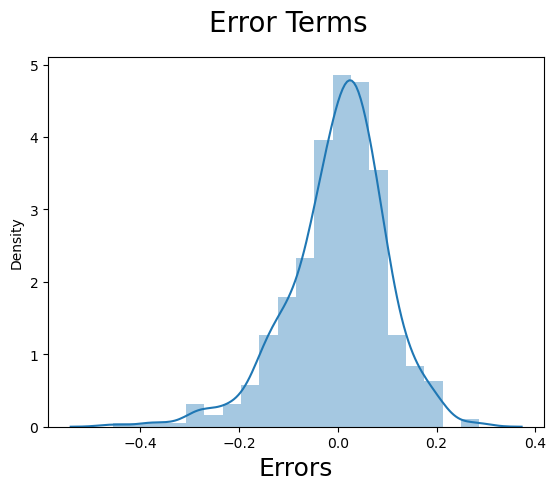

In [1621]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

-- We could see that the residuals are Normally distributed. 

### Linear relationship between X and Y

<Figure size 1500x3000 with 0 Axes>

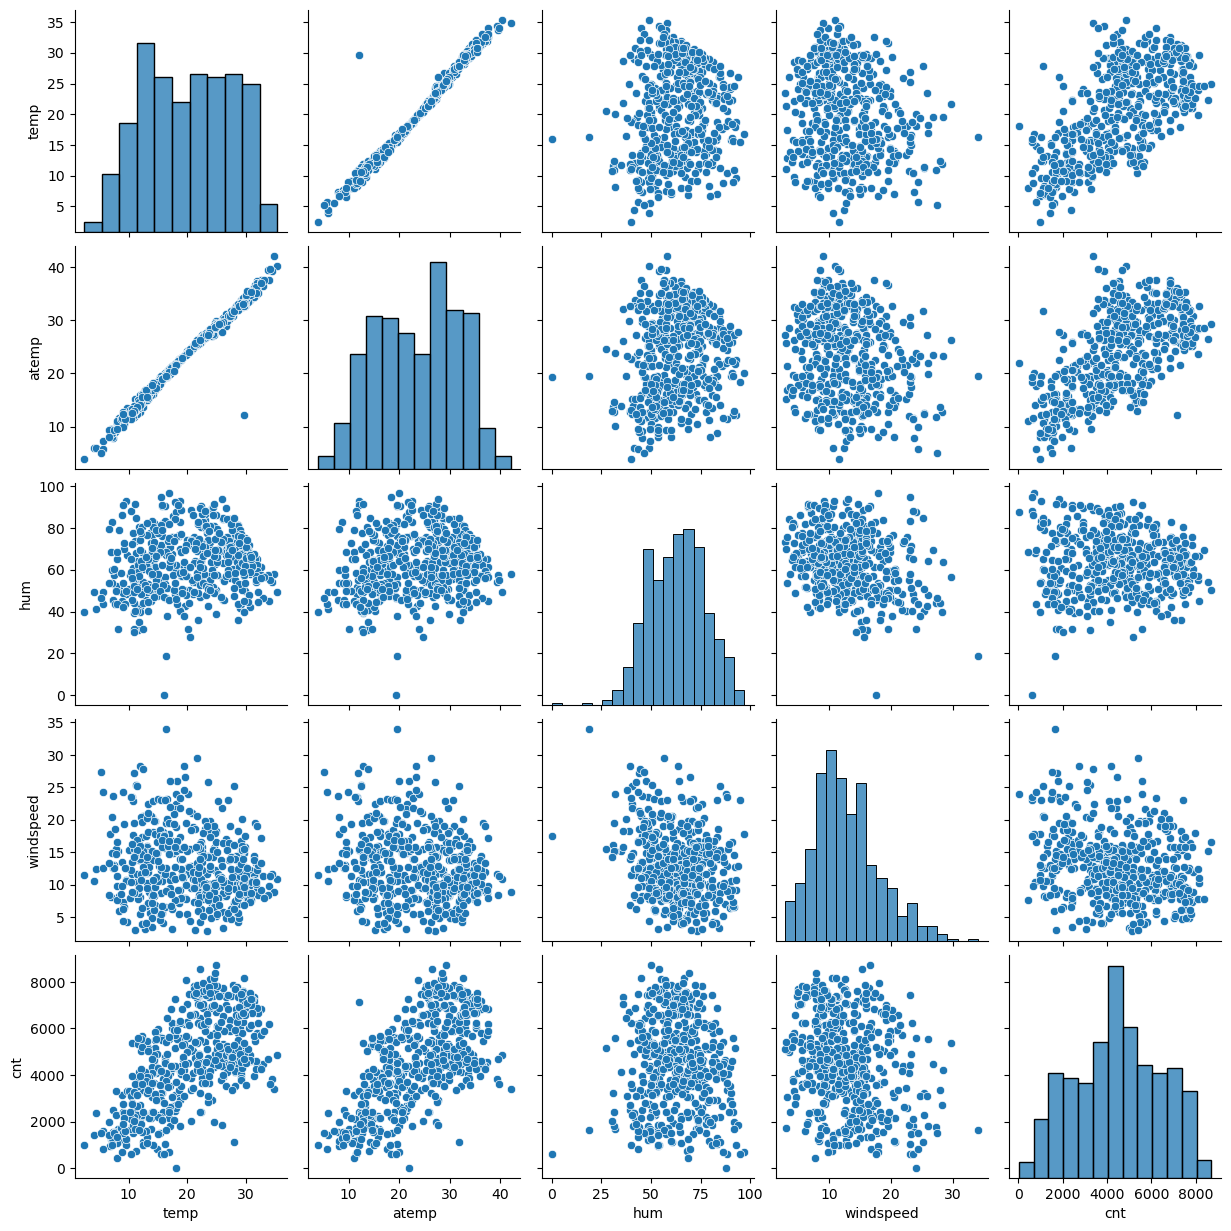

In [1622]:
plt.figure(figsize = (15,30))
sns.pairplot(day_numeric)
plt.show()

From the pairplot, we can see there is a linear relationship between "temp" "atemp" and "cnt".

### No multicolinearity between the predictor variables

In [1623]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.99
3,windspeed,3.01
0,yr,2.00
4,season_2,1.79
6,mnth_8,1.57
5,season_4,1.44
7,mnth_9,1.29
8,weathersit_3,1.06
1,holiday,1.04


* There is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

## Making Predictions

In [1624]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [1625]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1626]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [1627]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_2', 'season_4', 'mnth_8',
       'mnth_9', 'weathersit_3'],
      dtype='object')

In [1628]:
X_test_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_2', 'season_4',
       'mnth_8', 'mnth_9', 'weathersit_3'],
      dtype='object')

In [1629]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1630]:
# Making predictions
y_pred = lm6.predict(X_test_new)

### MODEL EVALUATION

Text(0, 0.5, 'y_pred')

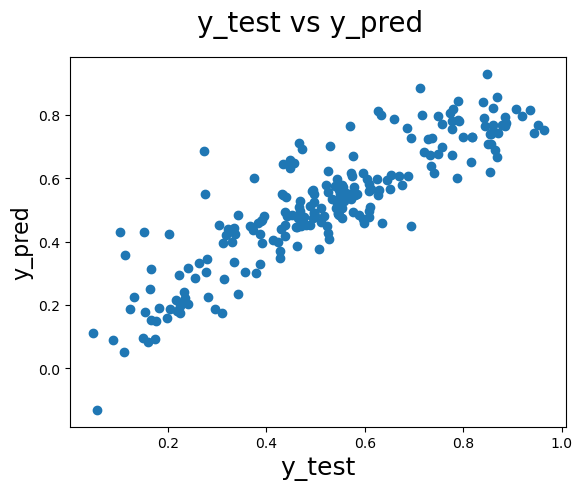

In [1631]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### Calculating R-squared value for TEST

In [1632]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7731388699761521

In [1633]:
# We already have the value of R^2 (calculated in above step)

r2=0.7731388699761521

In [1634]:
# Get the shape of X_test_new
X_test_new.shape

(220, 10)

In [1635]:
# n is number of rows in X

n = X_test_new.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.76228427045348

#### FINAL RESULTS

    Train R2 - 0.806
    Train adjusted_r2 - 0.802


    Test R2 - 0.7731388699761521
    Test adjusted_r2 - 0.76228427045348

### Final Report As Per The Model

    const           0.090030
    yr              0.233233
    holiday        -0.084826
    temp            0.546436
    windspeed      -0.142707
    season_2        0.090521
    season_4        0.131612
    mnth_8          0.039352
    mnth_9          0.100173
    weathersit_3   -0.251998


- The top 3 predictor variables that influences the bike hiring are:
    
    1. temp - A unit increase in the variable temp increases the bike hire by 0.546436 units.
    2. weathersit_3 - A unit increase in weathersit_3 variable decreases the bike hire by 0.251998 units.
    3. yr - A coefficient value for yr of ‘0.233233’ indicates that a unit increase in yr variable, increases the bike hire numbers by 0.233233 units.
    
So, we can suggest the bike hiring company to give importance to these variables to achieve maximum booking.


- Considering other features,
    
    * windspeed - A unit increase in windspeed variable decreases the bike hire by 0.142707 units.
    * season_4 - A unit increase in season_4 variable increases the bike hire by 0.131612 units.


   * weathersit_3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
   * season_4 - winter
   * season_2 - summer